# __Environment__

In [31]:
# Import necessary libraries
import socket
import cutax
import strax
import straxen
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from matplotlib.colors import LogNorm
from matplotlib.ticker import AutoMinorLocator
from scipy.optimize import curve_fit

# Set the matplotlib style to 'xenonnt' for XENONnT experiment specific styling
plt.style.use("xenonnt")

# Display the versions of strax and straxen to ensure compatibility
straxen.print_versions()


,module,version,path,git
0,python,3.9.19,/opt/XENONnT/anaconda/envs/XENONnT_development...,None
1,strax,1.6.4,/opt/XENONnT/anaconda/envs/XENONnT_development...,None
2,straxen,2.2.4,/opt/XENONnT/anaconda/envs/XENONnT_development...,None
3,cutax,1.18.3,/project2/lgrandi/xenonnt/software/cutax/v1.18...,None


In [3]:
# Initialize the straxen context for XENONnT offline data

st = straxen.contexts.xenonnt_online()


You specified _auto_append_rucio_local=True and you are not on dali compute nodes, so we will add the following rucio local path: /project/lgrandi/rucio/


In [4]:
run_ids = ['053170', '053194', '053195', '053196', '053197', '053199',
       '053201', '053202', '053203', '053204', '053206', '053208',
       '053337', '053340', '053343', '053346', '053349', '053352',
       '053355', '053362']

data_full = st.get_df(
    run_ids,
    targets="event_basics",
    progress_bar=False
)


Loading 20 runs:   0%|          | 0/20 [00:00<?, ?it/s]

/opt/XENONnT/anaconda/envs/XENONnT_development/lib/python3.9/site-packages/straxen/config/preprocessors.py:16: UserWarning: From straxen version 2.1.0 onward, URLConfig parameterswill be sorted alphabetically before being passed to the plugins, this will change the lineage hash for non-sorted URLs. To load data processed with non-sorted URLs, you will need to use an older version.
  warnings.warn(


In [5]:
data_full

,run_id,time,endtime,n_peaks,drift_time,event_number,s1_index,alt_s1_index,s1_time,alt_s1_time,...,alt_s2_x_cnn,alt_s2_y_cnn,s2_x_gcn,s2_y_gcn,alt_s2_x_gcn,alt_s2_y_gcn,s2_x_mlp,s2_y_mlp,alt_s2_x_mlp,alt_s2_y_mlp
0,053170,1689320772247899992,1689320772250733040,19,390117.0,0,0,-1,1689320772250061240,-1,...,34.560810,-7.417524,34.842606,-2.265227,34.781162,-7.214653,34.484989,-1.939144,34.393009,-7.333889
1,053170,1689320772536487402,1689320772539221360,7,NaN,1,-1,-1,-1,-1,...,12.313119,-7.436294,11.720281,-8.263883,12.139491,-6.947607,11.792753,-8.547812,11.588064,-7.541642
2,053170,1689320772583145082,1689320772585875560,6,2141836.0,2,0,-1,1689320772583465910,-1,...,-27.213667,31.608799,-27.975616,30.359886,-32.221203,32.301857,-28.081232,30.594189,-28.714155,31.280811
3,053170,1689320772684402452,1689320772687145950,26,1722767.0,3,0,-1,1689320772685147190,-1,...,-11.810213,35.184059,-28.324759,51.213627,-24.564199,52.556026,-28.198181,51.317886,-23.699245,49.858440
4,053170,1689320772892793452,1689320772895515910,12,32229.0,4,0,-1,1689320772895221620,-1,...,-28.172096,13.666648,-27.497292,13.487843,-28.042879,14.014143,-27.893333,12.963799,-28.282759,13.554091
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2790072,053362,1690534182570393612,1690534182573118190,7,NaN,17358,-1,-1,-1,-1,...,13.994507,46.490395,12.803311,47.660976,13.655982,46.519615,12.776078,47.031189,14.017627,46.660007
2790073,053362,1690534182776347502,1690534182779499760,44,1873774.0,17359,0,-1,1690534182777066410,-1,...,-0.609144,-16.875551,6.321064,-14.125962,-0.405766,-16.866911,6.264530,-13.877613,-0.577137,-16.816126
2790074,053362,1690534182936715792,1690534182939457630,12,23019.0,17360,0,-1,1690534182939160340,-1,...,-35.403835,-24.783510,-36.365051,-23.787071,-35.515999,-24.988375,-36.261799,-23.563856,-35.419334,-24.453186
2790075,053362,1690534183073509442,1690534183076515480,14,792990.0,17361,0,-1,1690534183075174730,-1,...,-41.432858,-6.883455,-48.133293,15.417539,-44.071659,-6.218955,-47.612389,15.693284,-45.205528,0.394203


# __check_range_area__

In [7]:
# Select only the desired columns
data_selected_columns = data_full[["s1_center_time", "alt_s1_center_time", "s1_area", "alt_s1_area"]]

# Filter out rows where 's1_center_time' or 'alt_s1_center_time' is -1, or 's1_area' or 'alt_s1_area' is NaN
data = data_selected_columns[
    (data_selected_columns['s1_center_time'] != -1) & 
    (data_selected_columns['alt_s1_center_time'] != -1) &
    (~data_selected_columns['s1_area'].isna()) & 
    (~data_selected_columns['alt_s1_area'].isna())
]


In [8]:
data


,s1_center_time,alt_s1_center_time,s1_area,alt_s1_area
7,1689320773220505143,1689320773220226721,8.919327,8.525675
8,1689320773233761680,1689320773233782413,10519.833008,1.909849
9,1689320773293912322,1689320773295736107,489.875671,15.338335
16,1689320773857390287,1689320773857396514,4186.761230,1.948297
25,1689320775290377841,1689320775290894135,12251.157227,3739.121094
...,...,...,...,...
2790024,1690534175407032533,1690534175407005620,16.669861,10.340211
2790036,1690534176004353664,1690534176006223557,25766.000000,15.971260
2790047,1690534178595337026,1690534178595394919,11020.960938,2.571723
2790060,1690534181333182883,1690534181333188114,6291.767578,2.285218


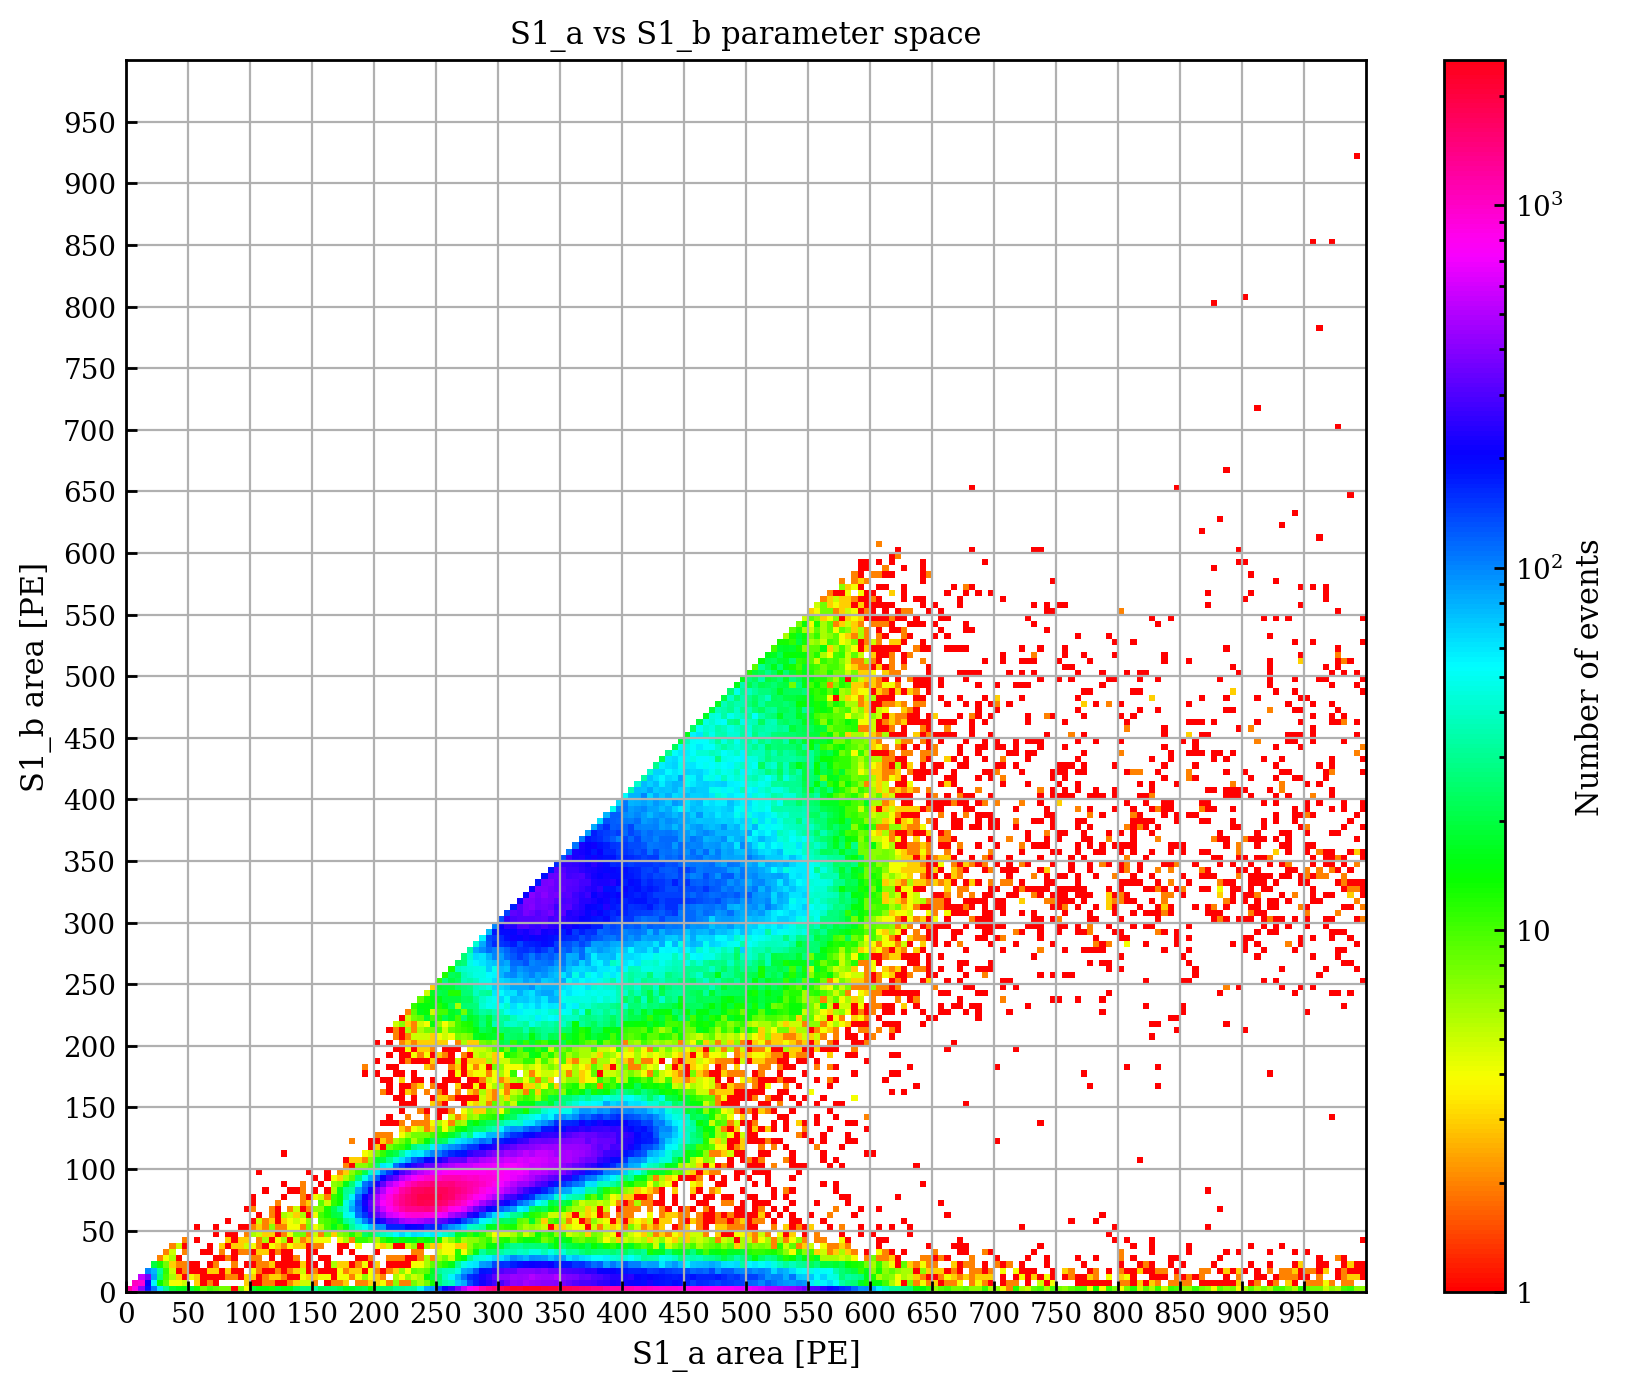

In [9]:
# Set the number of bins and the range based on the data or desired resolution
bins = [200, 200]  # example bin sizes for x and y
range = [[0, 1000], [0, 1000]]  # ranges for x and y

# Plot the histogram of s1_area vs alt_s1_area
plt.figure(figsize=(10, 8))
plt.hist2d(data['s1_area'], data['alt_s1_area'], bins=bins, range=range, cmap='hsv', norm=LogNorm())

# Add colorbar to show the scale
plt.colorbar(label='Number of events')

# Label the axes
plt.xlabel('S1_a area [PE]')
plt.ylabel('S1_b area [PE]')

# Set the title
plt.title('S1_a vs S1_b parameter space')

# Define the tick interval
x_tick_interval = 50
y_tick_interval = 50

# Set the ticks for x and y axes
plt.xticks(range[0][0] + np.arange(0, range[0][1], x_tick_interval))
plt.yticks(range[1][0] + np.arange(0, range[1][1], y_tick_interval))

# Turn the grid on
plt.grid(True)

# Show the plot
plt.show()


# __s1_delay_time__

In [10]:
# Select only the desired columns
data_selected_columns = data_full[["s1_center_time", "alt_s1_center_time", "s1_area", "alt_s1_area"]]

# Apply the initial filter to remove unwanted rows
initial_filtered_data = data_selected_columns[
    (data_selected_columns['s1_center_time'] != -1) & 
    (data_selected_columns['alt_s1_center_time'] != -1) &
    (~data_selected_columns['s1_area'].isna()) & 
    (~data_selected_columns['alt_s1_area'].isna())
]

# Apply stricter filters: 's1_area' in range [150,500] and 'alt_s1_center_time' in range [25,200]
strict_filtered_data = initial_filtered_data[
    (initial_filtered_data['s1_area'] >= 150) & (initial_filtered_data['s1_area'] <= 500) &
    (initial_filtered_data['alt_s1_area'] >= 25) & (initial_filtered_data['alt_s1_area'] <= 200)
]

# The final data ready for analysis or plotting
data = strict_filtered_data


In [11]:
data


,s1_center_time,alt_s1_center_time,s1_area,alt_s1_area
31,1689320776446641110,1689320776446642395,269.047363,90.055656
37,1689320777323291826,1689320777323292472,224.448578,63.055466
117,1689320790375100771,1689320790375101597,208.715057,87.280037
133,1689320793539850334,1689320793539850783,264.110077,76.096535
141,1689320794873283044,1689320794873283486,346.296936,114.863487
...,...,...,...,...
2789813,1690534144520366828,1690534144520367289,249.616791,66.169441
2789837,1690534149179850112,1690534149179850670,250.678116,76.634125
2789930,1690534162215726651,1690534162215727149,237.452286,72.812119
2789935,1690534163076876696,1690534163076877165,247.737198,72.496651


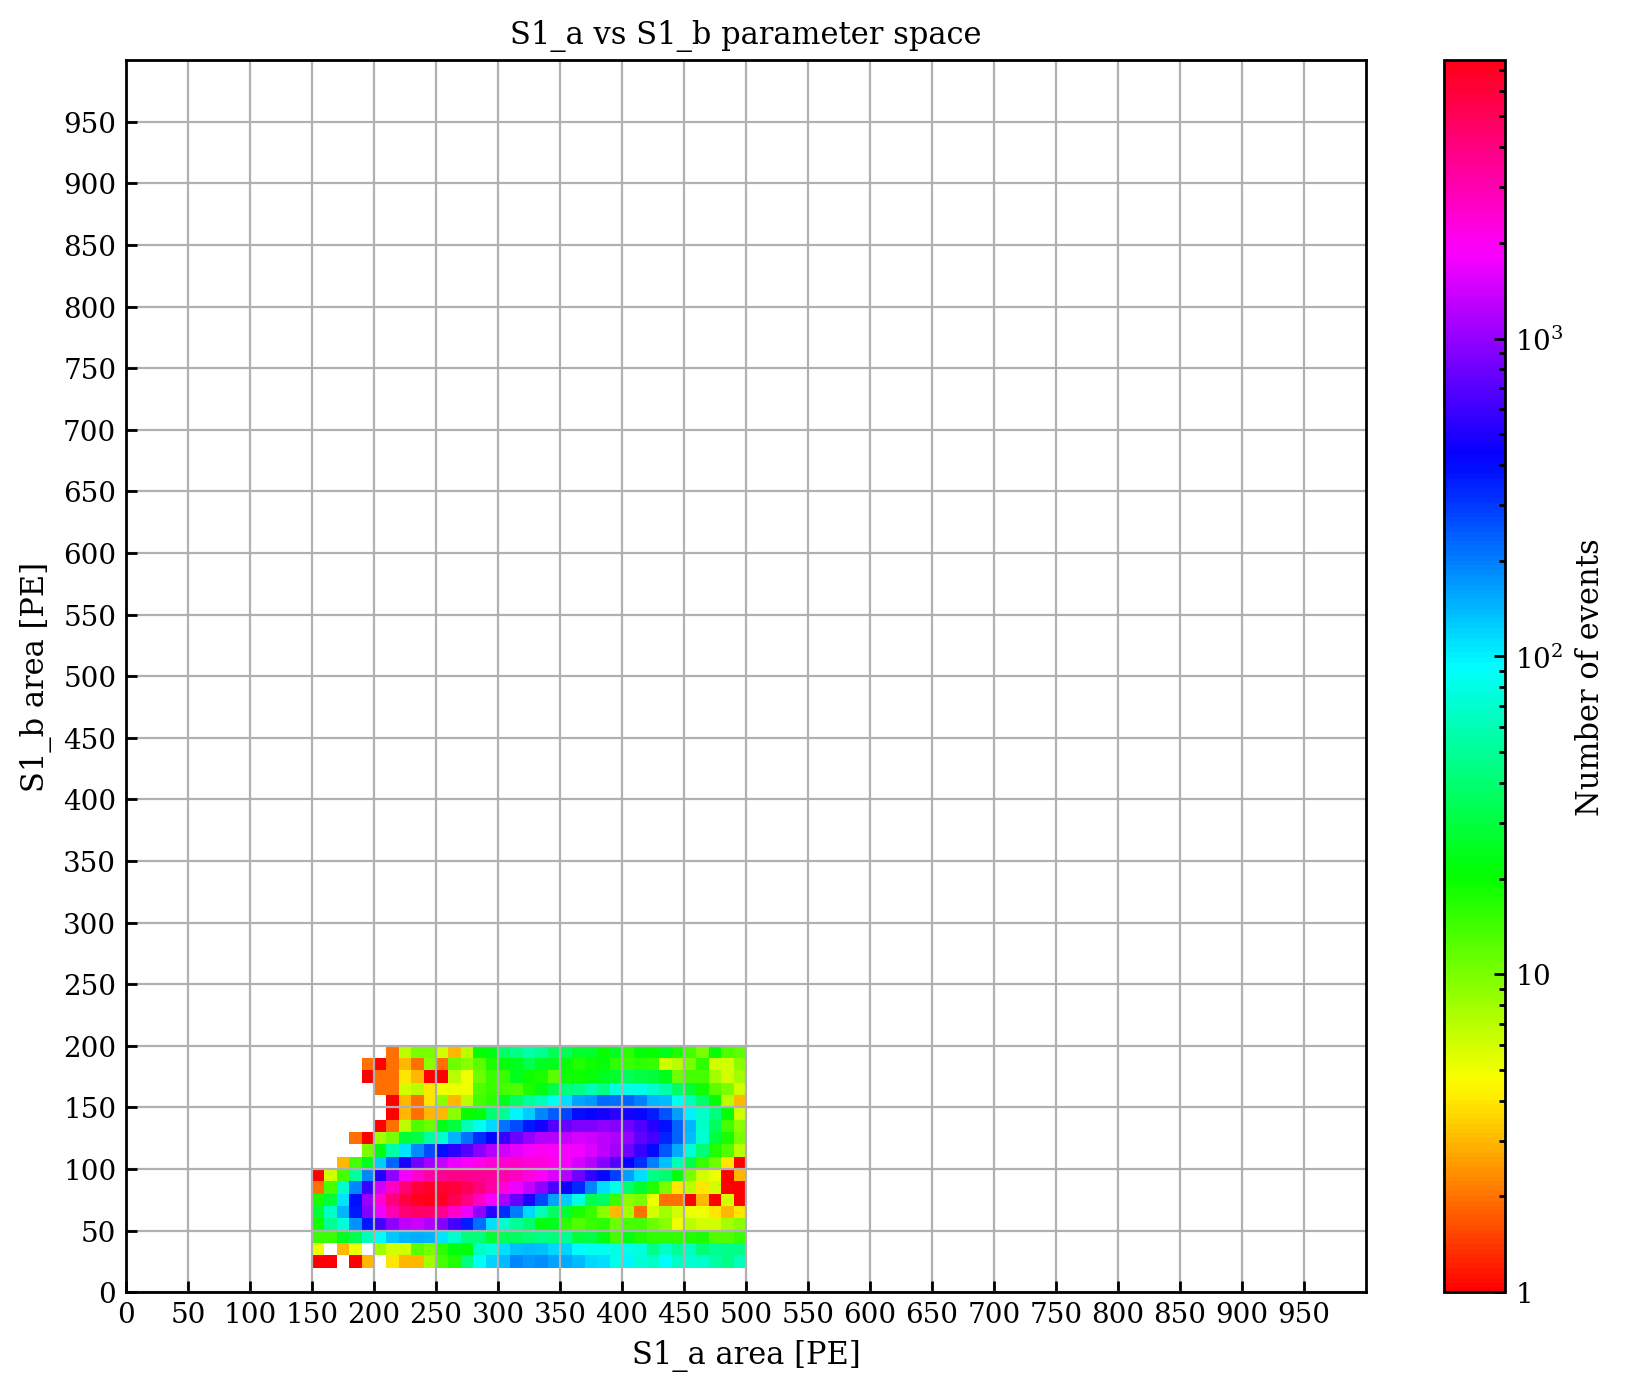

In [12]:
# Set the number of bins and the range based on the data or desired resolution
bins = [100, 100]  # example bin sizes for x and y
range = [[0, 1000], [0, 1000]]  # ranges for x and y

# Plot the histogram of s1_area vs alt_s1_area
plt.figure(figsize=(10, 8))
plt.hist2d(data['s1_area'], data['alt_s1_area'], bins=bins, range=range, cmap='hsv', norm=LogNorm())

# Add colorbar to show the scale
plt.colorbar(label='Number of events')

# Label the axes
plt.xlabel('S1_a area [PE]')
plt.ylabel('S1_b area [PE]')

# Set the title
plt.title('S1_a vs S1_b parameter space')

# Define the tick interval
x_tick_interval = 50
y_tick_interval = 50

# Set the ticks for x and y axes
plt.xticks(range[0][0] + np.arange(0, range[0][1], x_tick_interval))
plt.yticks(range[1][0] + np.arange(0, range[1][1], y_tick_interval))

# Turn the grid on
plt.grid(True)

# Show the plot
plt.show()


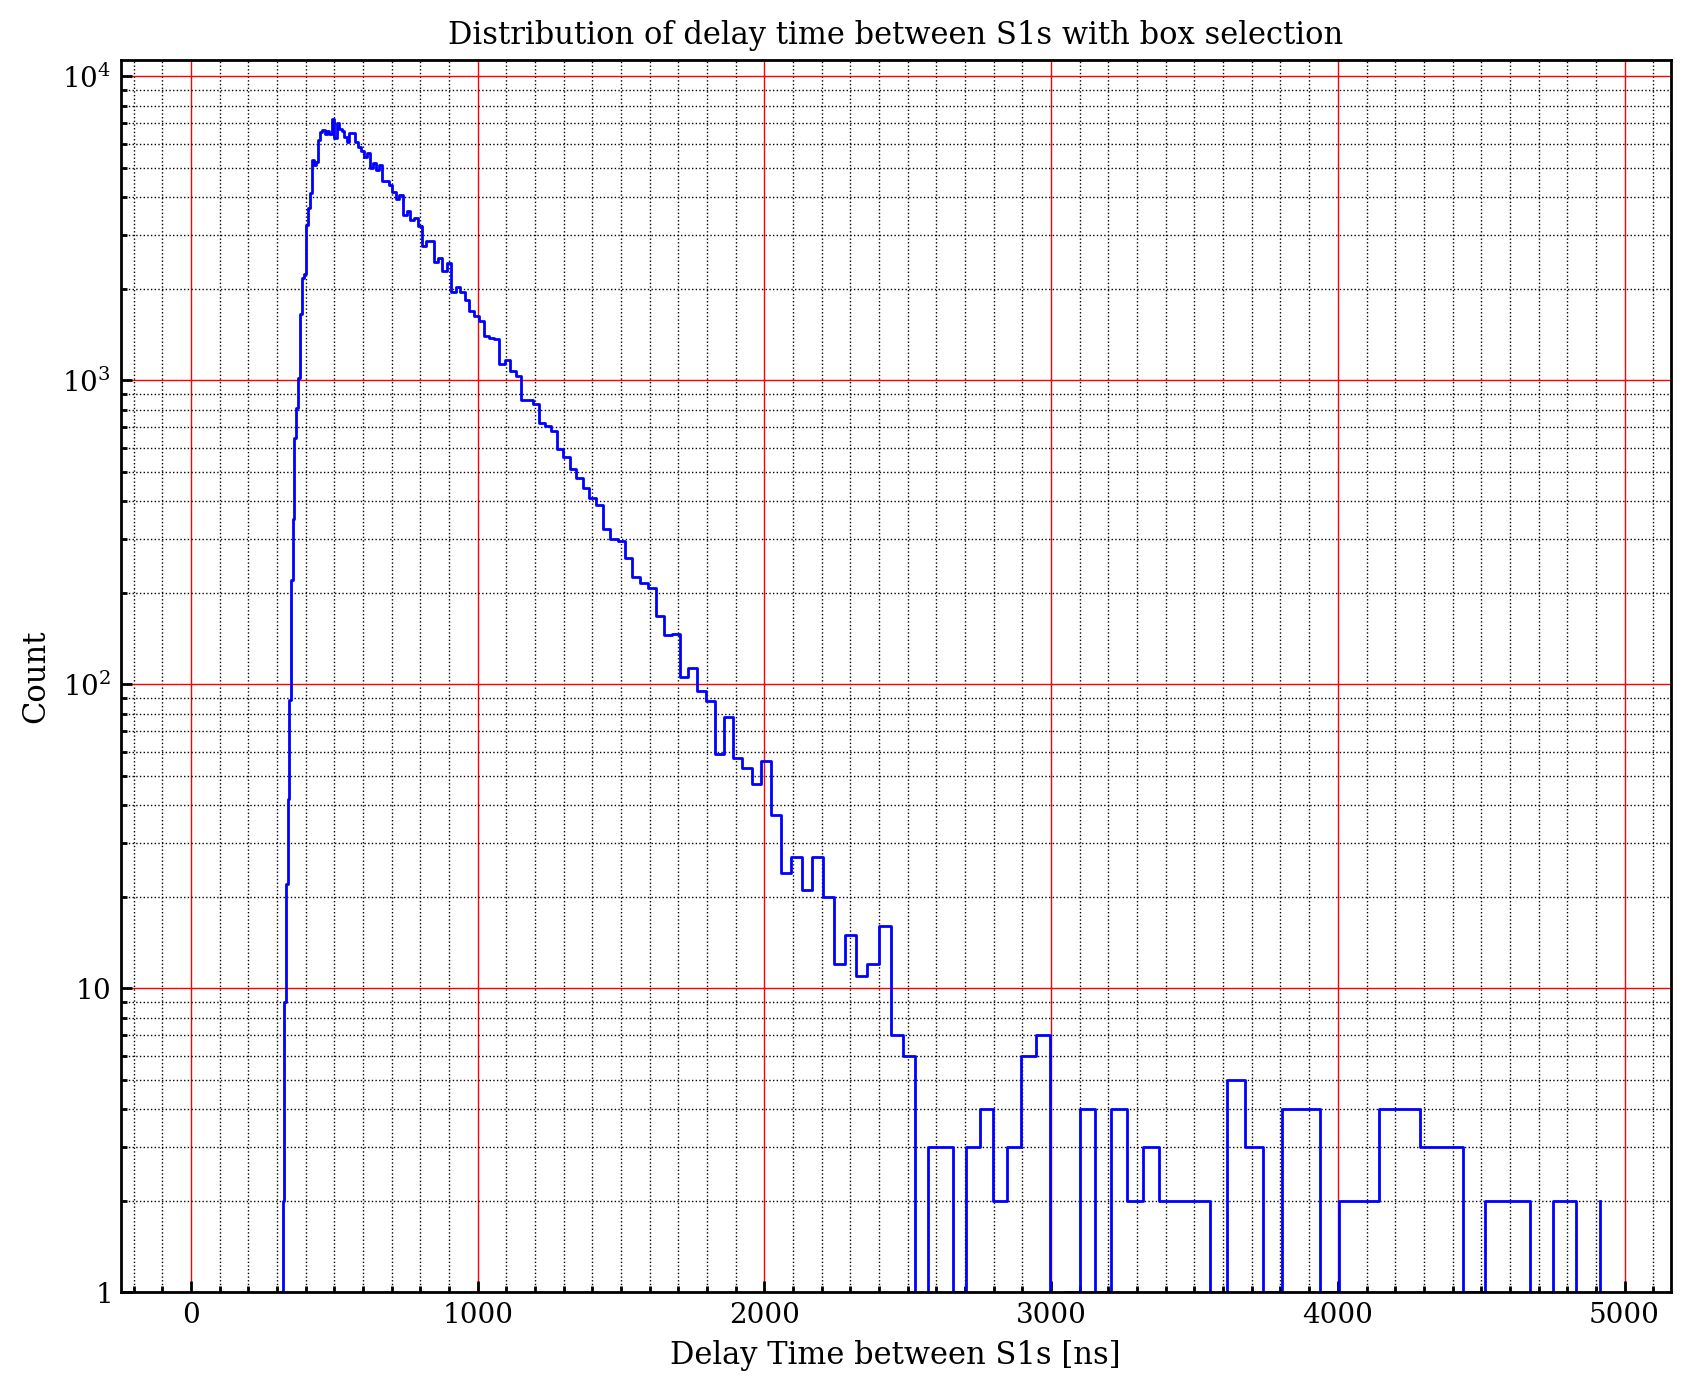

In [13]:
# Assuming strict_filtered_data is already defined and filtered
data = strict_filtered_data.copy()

# Calculate the delay time between S1s
data.loc[:, 'delay_time'] = data['alt_s1_center_time'] - data['s1_center_time']

# Define the bins for the histogram and calculate the histogram data
bins = np.logspace(np.log10(1), np.log10(5000), 500)
counts, bin_edges = np.histogram(data['delay_time'], bins=bins)

# Create the plot
plt.figure(figsize=(10, 8))
plt.step(bin_edges[:-1], counts, where='post', color='blue')

# Set to y-log scale
plt.yscale('log')

# Set y-axis to start at the lowest non-zero count
plt.ylim(bottom=1)

# Add labels and title
plt.xlabel('Delay Time between S1s [ns]')
plt.ylabel('Count')
plt.title('Distribution of delay time between S1s with box selection')

# Set the x-ticks to show every 1000 units
major_ticks = np.arange(0, 5001, 1000)
plt.xticks(major_ticks)

# Set the minor ticks to be shown at every 100 units
plt.gca().xaxis.set_minor_locator(AutoMinorLocator(10))

# Add major and minor grid
plt.grid(which='major', linestyle='-', linewidth='0.5', color='red')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')

# Show the plot
plt.show()


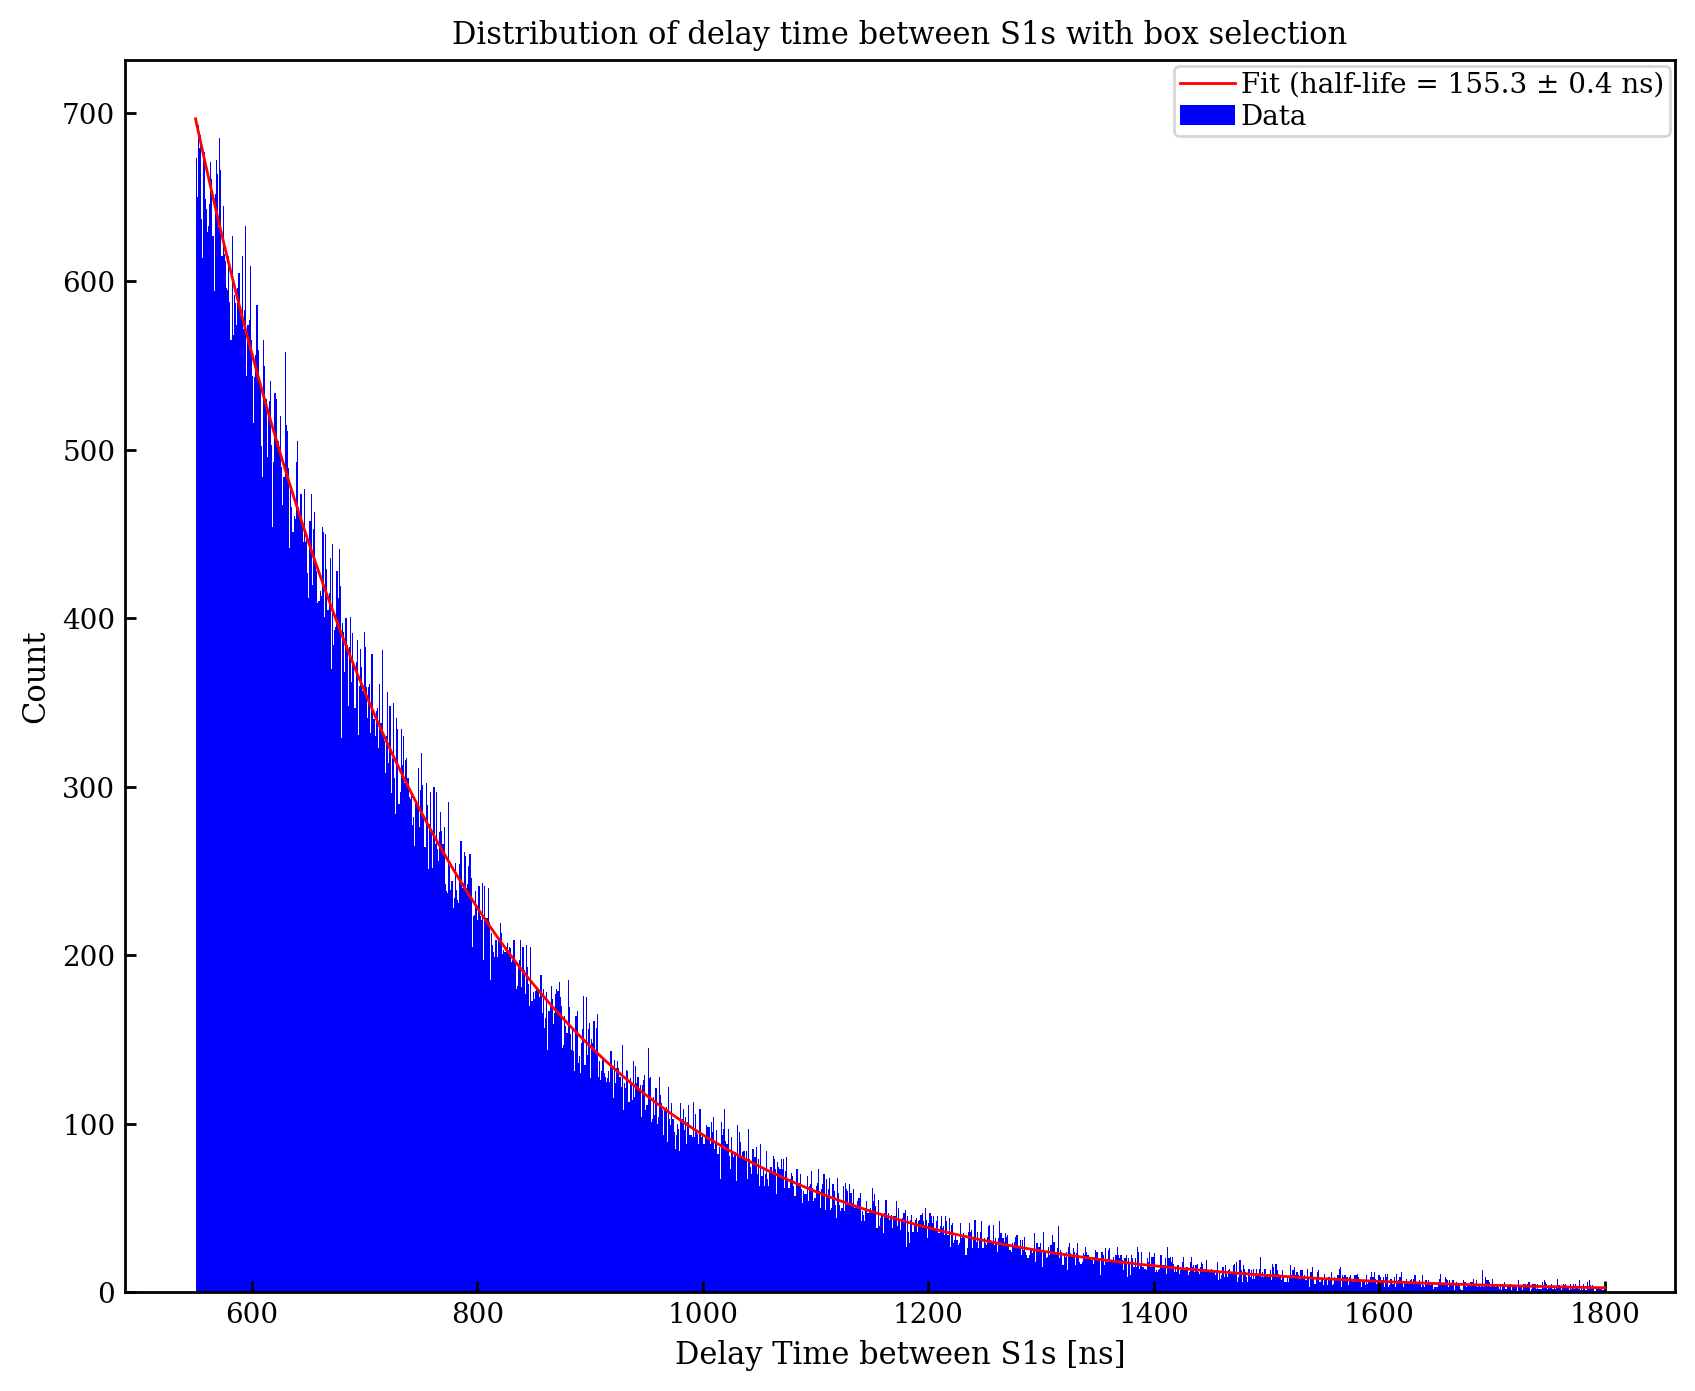

In [14]:

# Assuming strict_filtered_data is already defined and filtered
data = strict_filtered_data.copy()

# Calculate the delay time between S1s
data['delay_time'] = data['alt_s1_center_time'] - data['s1_center_time']

# Filter the delay time data to the range [550, 1800] ns
filtered_data = data[(data['delay_time'] >= 550) & (data['delay_time'] <= 1800)]

# Define the bins for the histogram within the range [550, 1800] and calculate the histogram data
bins = np.linspace(550, 1800, 1251)  # 1251 bins for 1 ns per bin
counts, bin_edges = np.histogram(filtered_data['delay_time'], bins=bins)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

# Define the exponential decay function
def exp_decay(x, A, tau):
    return A * np.exp(-x / tau)

# Estimate uncertainties in the counts, replace zeros with ones to avoid division by zero
uncertainties = np.sqrt(counts)
uncertainties[uncertainties == 0] = 1  # Replace zeros with ones

# Fit the exponential decay function to the histogram data, using the uncertainties
params, covariance = curve_fit(exp_decay, bin_centers, counts, p0=[np.max(counts), 150], sigma=uncertainties)

# Calculate the half-life from the decay constant tau
half_life = params[1] * np.log(2)

# Calculate the standard errors of the fitted parameters
perr = np.sqrt(np.diag(covariance))

# Calculate the uncertainty in the half-life
half_life_unc = perr[1] * np.log(2)

# Generate data for the fitted curve
x_fit = np.linspace(550, 1800, 1000)
y_fit = exp_decay(x_fit, *params)

# Create the plot for the data
plt.figure(figsize=(10, 8))
plt.bar(bin_centers, counts, width=np.diff(bin_edges), color='blue', label='Data')

# Plot the fit
plt.plot(x_fit, y_fit, color='red', label=f'Fit (half-life = {half_life:.1f} ± {half_life_unc:.1f} ns)')

# Add labels, legend, and title
plt.xlabel('Delay Time between S1s [ns]')
plt.ylabel('Count')
plt.title('Distribution of delay time between S1s with box selection')
plt.legend()

# Show the plot
plt.show()


# __sys_error_histo__

In [17]:
def filter_data(s1_area_range, alt_s1_area_range, data_full=data_full):
    """
    Applies initial and stricter filters to the dataset.
    
    Parameters:
    - s1_area_range: Tuple or list with two elements for the minimum and maximum s1_area.
    - alt_s1_area_range: Tuple or list with two elements for the minimum and maximum alt_s1_area.
    
    Returns:
    - DataFrame after applying the filters.
    - Number of rows in the filtered DataFrame.
    """

    # Select only the desired columns
    data_selected_columns = data_full[["s1_center_time", "alt_s1_center_time", "s1_area", "alt_s1_area"]]

    # Apply the initial filter to remove unwanted rows
    initial_filtered_data = data_selected_columns[
        (data_selected_columns['s1_center_time'] != -1) & 
        (data_selected_columns['alt_s1_center_time'] != -1) &
        (~data_selected_columns['s1_area'].isna()) & 
        (~data_selected_columns['alt_s1_area'].isna())
    ]

    # Apply stricter filters based on input ranges
    strict_filtered_data = initial_filtered_data[
        (initial_filtered_data['s1_area'] >= s1_area_range[0]) & (initial_filtered_data['s1_area'] <= s1_area_range[1]) &
        (initial_filtered_data['alt_s1_area'] >= alt_s1_area_range[0]) & (initial_filtered_data['alt_s1_area'] <= alt_s1_area_range[1])
    ]
    
    return strict_filtered_data, strict_filtered_data.shape[0]

def calculate_half_life(data, delay_time_range):
    """
    Calculates the half-life from the delay time data within a specified range, and returns the number of data points used.
    
    Parameters:
    - data: DataFrame with the filtered data.
    - delay_time_range: Tuple or list with two elements for the minimum and maximum delay time.
    
    Returns:
    - Half-life and its uncertainty.
    - Number of data points used in the analysis.
    """
    # Calculate the delay time between S1s
    data['delay_time'] = data['alt_s1_center_time'] - data['s1_center_time']

    # Filter the delay time data to the specified range
    filtered_data = data[(data['delay_time'] >= delay_time_range[0]) & (data['delay_time'] <= delay_time_range[1])]
    num_data_points = len(filtered_data)

    # Define the bins for the histogram within the range and calculate the histogram data
    bins = np.linspace(delay_time_range[0], delay_time_range[1], int(delay_time_range[1] - delay_time_range[0]) + 1)
    counts, bin_edges = np.histogram(filtered_data['delay_time'], bins=bins)
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

    # Define the exponential decay function
    def exp_decay(x, A, tau):
        return A * np.exp(-x / tau)

    # Estimate uncertainties in the counts, replacing zeros with ones to avoid division by zero
    uncertainties = np.sqrt(counts)
    uncertainties[uncertainties == 0] = 1

    # Fit the exponential decay function to the histogram data, using the uncertainties
    params, covariance = curve_fit(exp_decay, bin_centers, counts, p0=[np.max(counts), 150], sigma=uncertainties)

    # Calculate the half-life and its uncertainty
    half_life = params[1] * np.log(2)
    perr = np.sqrt(np.diag(covariance))
    half_life_unc = perr[1] * np.log(2)

    return half_life, half_life_unc, num_data_points

# Example usage:
s1_area_range = (150, 500)  # Adjustable
alt_s1_area_range = (25, 200)  # Adjustable
strict_filtered_data, num_rows = filter_data(s1_area_range, alt_s1_area_range)
# print(f"Number of rows after filtering(area adjustment): {num_rows}")

delay_time_range = (550, 1800)  # Adjustable
half_life, half_life_unc, num_data_points = calculate_half_life(strict_filtered_data, delay_time_range)
print(f"Number of data points used(time range adjustment): {num_data_points}")
print(f"Half-life: {half_life:.1f} ns ± {half_life_unc:.1f} ns")


Number of data points used(time range adjustment): 156686
Half-life: 155.3 ns ± 0.4 ns


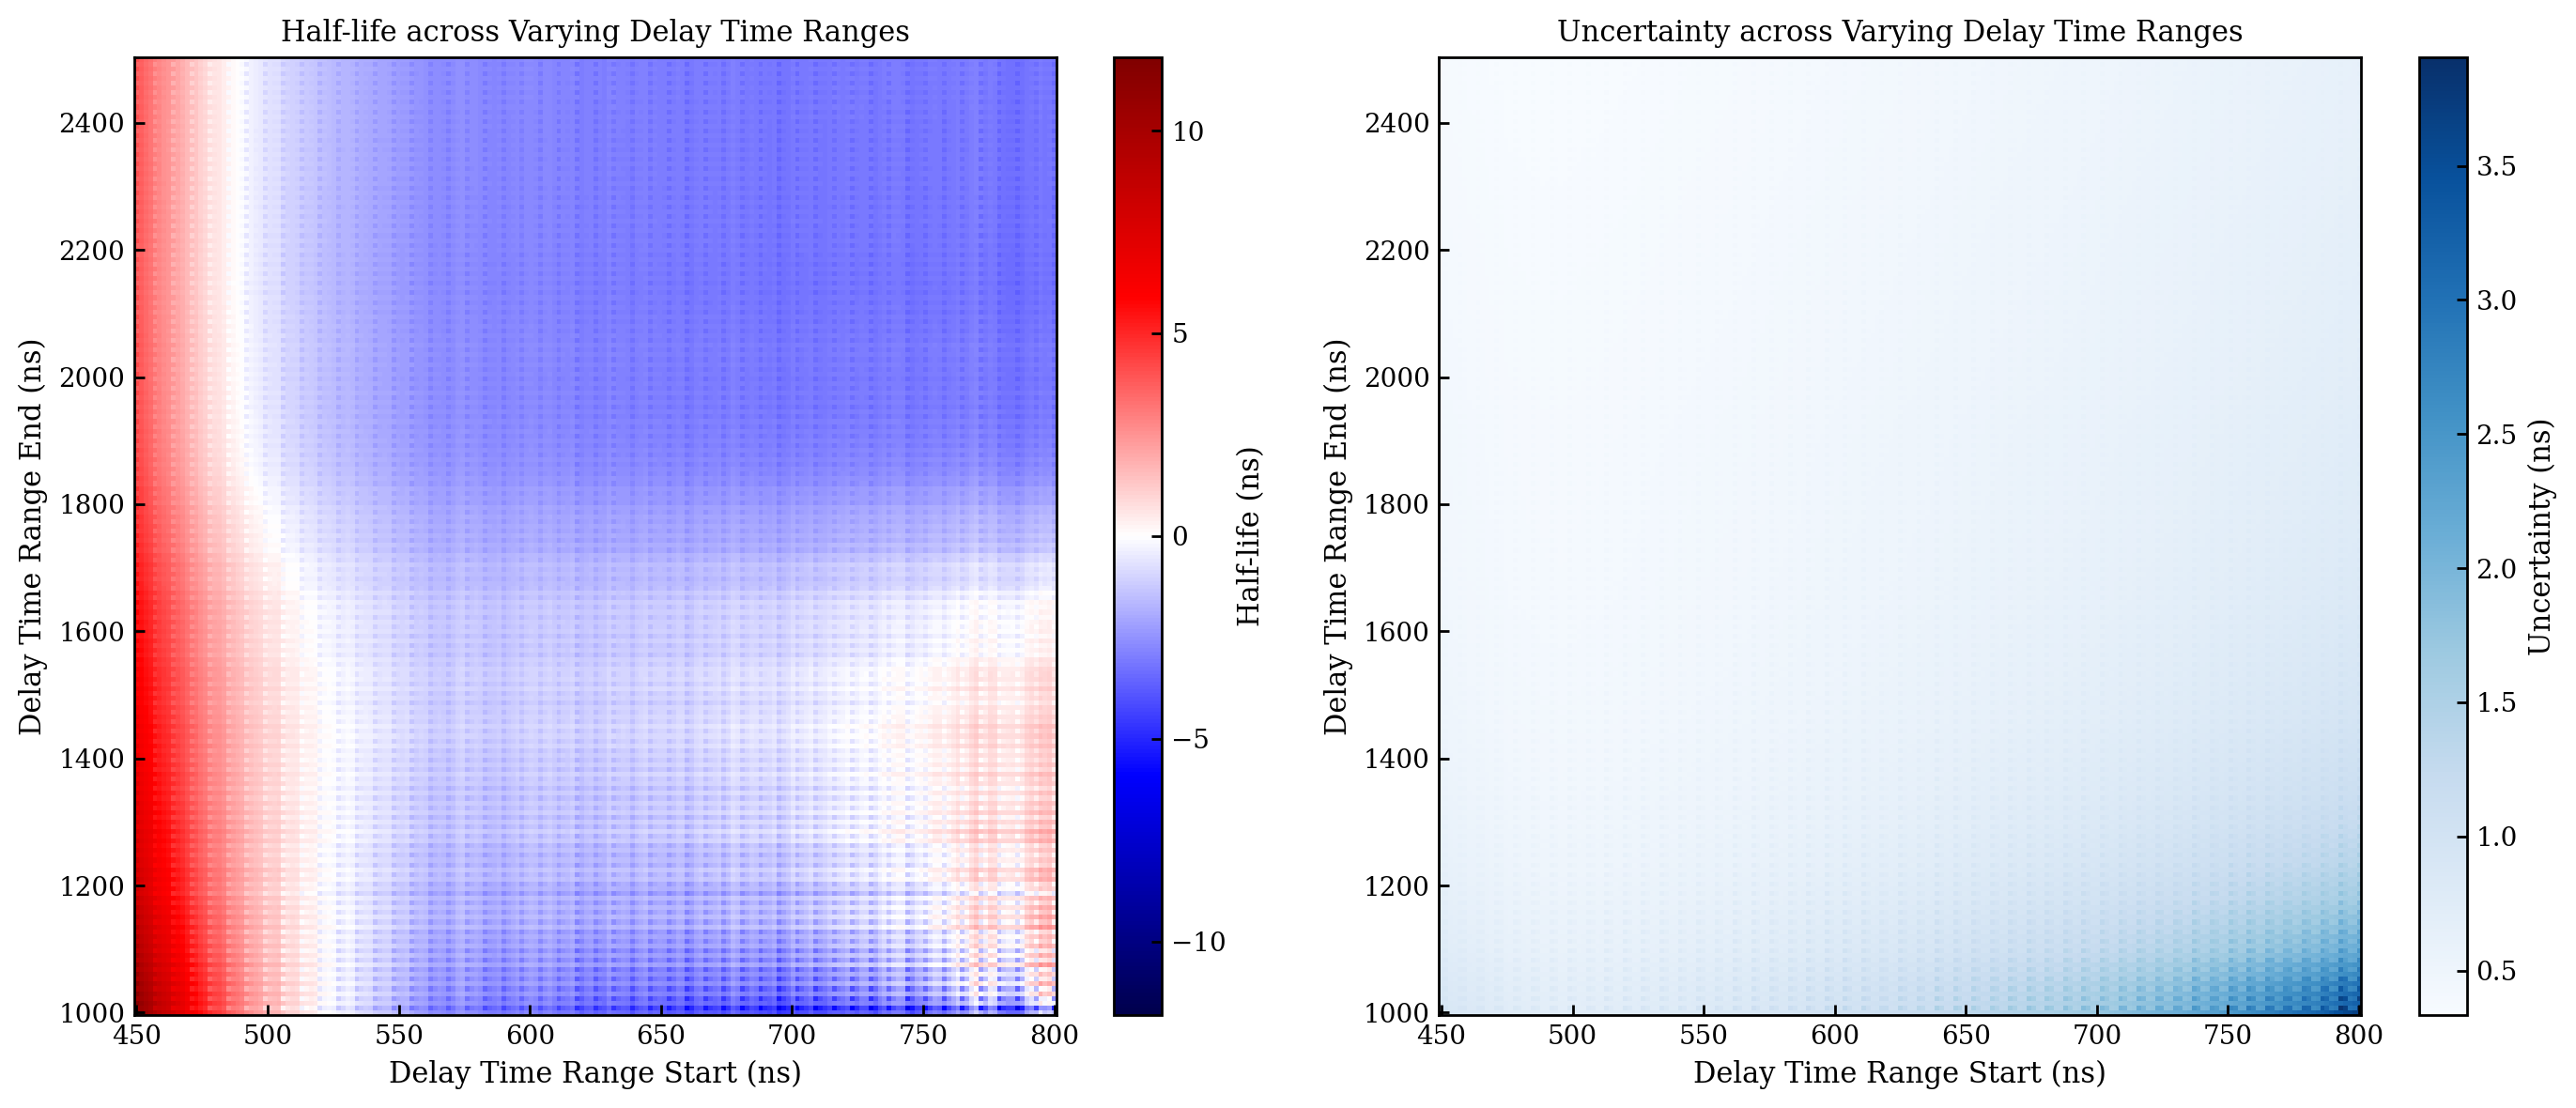

In [18]:
# Define ranges for start and end points of delay time
start_range = np.linspace(450, 800, 201)
end_range = np.linspace(1000, 2500, 201)

# Initialize arrays to store results
start_points, end_points = np.meshgrid(start_range, end_range)
half_lives = np.zeros(start_points.shape)
uncertainties = np.zeros(start_points.shape)

# Loop through each combination of start and end points
for i, start in enumerate(start_range):
    for j, end in enumerate(end_range):
        delay_time_range = (start, end)
        
        # Assume strict_filtered_data is available here as a result of the filter_data function
        half_life, half_life_unc, num_data_points = calculate_half_life(strict_filtered_data, delay_time_range)
        
        half_lives[j, i] = half_life - 157
        uncertainties[j, i] = half_life_unc - 0

# Plotting the 2D histograms

# Adjust the color scale for half-life to be symmetric around 0
hl_min, hl_max = np.min(half_lives), np.max(half_lives)
hl_limit = max(abs(hl_min), abs(hl_max))

# Half-life 2D histogram
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.pcolormesh(start_points, end_points, half_lives, shading='auto', cmap='seismic', vmin=-hl_limit, vmax=hl_limit)
plt.colorbar(label='Half-life (ns)')
plt.xlabel('Delay Time Range Start (ns)')
plt.ylabel('Delay Time Range End (ns)')
plt.title('Half-life across Varying Delay Time Ranges')

# Uncertainty 2D histogram
plt.subplot(1, 2, 2)
plt.pcolormesh(start_points, end_points, uncertainties, shading='auto', cmap='Blues')  # Automatically adjusts
plt.colorbar(label='Uncertainty (ns)')
plt.xlabel('Delay Time Range Start (ns)')
plt.ylabel('Delay Time Range End (ns)')
plt.title('Uncertainty across Varying Delay Time Ranges')

plt.tight_layout()
plt.show()
